# Labrapport TFY4125 Fysikk Vår 2024
*Skriv fullt navn på gruppas medlemmer samt dato for innlevering.*

Navn:  Mina Al Dolaimi, Lucas Vo, Patrick Sheehan, Emil Sylte, Filip Nilsen <br>


Institutt for Fysikk, NTNU <br>
Dato: 30.09.2024


## Sammendrag
De numeriske beregninge er slik vist i python programmet. Resultatene var at man mister total energi, som gir fysisk mening, og at eksperimentelle grafer stort sett samsvarer med beregnede. Likevel, ser vi at mange av approksimasjonene gjort medførte til marginale feil i grafene.

$\Delta E = (-0.001954016137210999 \pm 0.0009122245861020174)$ mJ

## Ren rulling på krum bane - teoretisk grunnlag
Figuren nedenfor viser ei kule som ruller på et krumt underlag, med krumning henholdsvis oppover (øverst) og nedover (nederst). I figuren angis tyngdekraften $Mg$ og de to komponentene av kontaktkraften fra underlaget på kula, henholdsvis normalkraften $N$ og friksjonskraften $f$. Dessuten er både hastigheten $v$, baneakselerasjonen $a$ og sentripetalakselerasjonen $a_\perp$ illustrert. Ved perfekt ren rulling - uten andre former for friksjon enn den statiske friksjonen $f$ som virker i kontaktpunktet mellom kula og underlaget - er kulas mekaniske energi bevart. Da er kulas hastighet entydig bestemt av endringen $y$ i den vertikale posisjonen til kulas massesenter via
$$\frac{1}{2} (1+c) Mv^2 = Mgy,$$
idet vi antar at kula starter med hastighet $v=0$ i høyden $y=0$. Dersom kula er kompakt med uniform massefordeling, er $c=2/5$, slik at
$$v(y) = \sqrt{\frac{10}{7}gy}.$$
Kulas baneakselerasjon blir dermed
$$a = \frac{dv}{dt} = \frac{dv}{dy}\,\frac{dy}{dt} = \sqrt{\frac{5g}{24y}}\,v_y.$$
Her er $v_y = v \sin\beta = \sqrt{20gy/7}\sin\beta$ slik at
$$a = -\frac{5g\sin\beta}{7}.$$
Her er $\beta$ banens lokale helningsvinkel, knyttet til banens geometriske form $y(x)$ ved at
$$\frac{dy}{dx} = \tan\beta.$$
Vi innser nå at de to siste ligningene har konsistente fortegn: Kula ruller åpenbart saktere og saktere i motbakke.
Da er både $\sin\beta$ og $\tan\beta$ positive størrelser dersom $\beta > 0$.
Friksjonskraften kan nå bestemmes ved hjelp av Newtons 2. lov:
$$f - Mg\sin\beta = Ma = -\frac{5Mg\sin\beta}{7},$$
dvs
$$f = \frac{2Mg\sin\beta}{7}.$$
Retningen på $f$ må være konsistent med at vinkelfarten øker i nedoverbakke og minker i oppoverbakke. Av den grunn peker $f$ alltid oppover langs banen. Vi ser at fortegnet stemmer: Motbakke og $\beta > 0$ gir $f>0$, dvs framover og oppover. Utforbakke og $\beta < 0$ gir $f<0$, dvs bakover og oppover. <br>
Endelig kan normalkraften bestemmes ved hjelp av Newtons 2. lov i retning normalt på banen:
$$N - Mg\cos\beta = M a_\perp = M v^2/R = Mv^2K.$$
Her er $R$ banens krumningsradius og $K$ krumningen, gitt ved
$$K = \frac{y''}{[1+(y')^2]^{3/2}},$$
med $y' = dy/dx$ og $y'' = d^2y/dx^2$. Normalkraften har selvsagt retning oppover til enhver tid (dvs med positiv $y$-komponent). Sentripetalakselerasjonen har retning inn mot sentrum av den tenkte sirkelen med radius $R$. Når banen krummer oppover, er $y'' > 0$ og $K > 0$ i siste ligning. Det betyr at fortegnet stemmer: $N$ er større enn tyngdens normalkomponent $Mg\cos\beta$ når banen krummer oppover. Og omvendt: Når banen krummer nedover, er $y'' < 0$ og $K < 0$ i siste ligning. Det gir en normalkraft $N$ som er mindre enn tyngdens normalkomponent. Av erfaring vet vi at dette stemmer: Kjører vi fort nok på ski over en 'kul', kan vi helt miste kontakten med underlaget, dvs $N=0$. Her skal vi sørge for at baneformen $y(x)$ er slik at den rullende kula hele tiden har god kontakt med underlaget.

In [52]:
from IPython import display
display.Image("krefter.png", width=400)

<b>Figur 1.</b> Kule som ruller på et krumt underlag. Her er $v$ kulas fart,
$a$ er baneakselerasjon, $a_\perp$ er sentripetalakselerasjon, $Mg$ er tyngdekraft,
$f$ er friksjonskraft og $N$ er normalkraft. Banens helningsvinkel $\beta$ er vinkelen mellom
positiv $x$-akse (horisontal og mot høyre) og retningen til $v$. <br><br>

## Baneform med kubiske *splines*

Baneformen fastlegges ved hjelp av tredjegradspolynomer på de 7 intervallene mellom de 8 tilfeldig valgte skruefestehøydene, slik at både banen $y(x)$, banens deriverte $dy/dx$ og banens andrederiverte $d^2y/dx^2$ er kontinuerlige i skruefestene. Dette gjøres i Python med funksjonen CubicSpline fra SciPy-biblioteket interpolate med kommandoen

*cs = CubicSpline(xfast,yfast,bc_type='natural')*

Her er xfast og yfast tabeller (numpy arrays) med henholdsvis horisontale og vertikale koordinater for skruefestene, og med *bc_type='natural'* velges krumning lik null i de to ytterste skruefestene. Horisontal avstand mellom skruefestene er 200 mm slik at xfast = (0,0.200,...,1.400) m. Vertikale koordinater for skruefestene fastlegges ved å trekke tilfeldige tall med numpy-funksjonen random.randint.


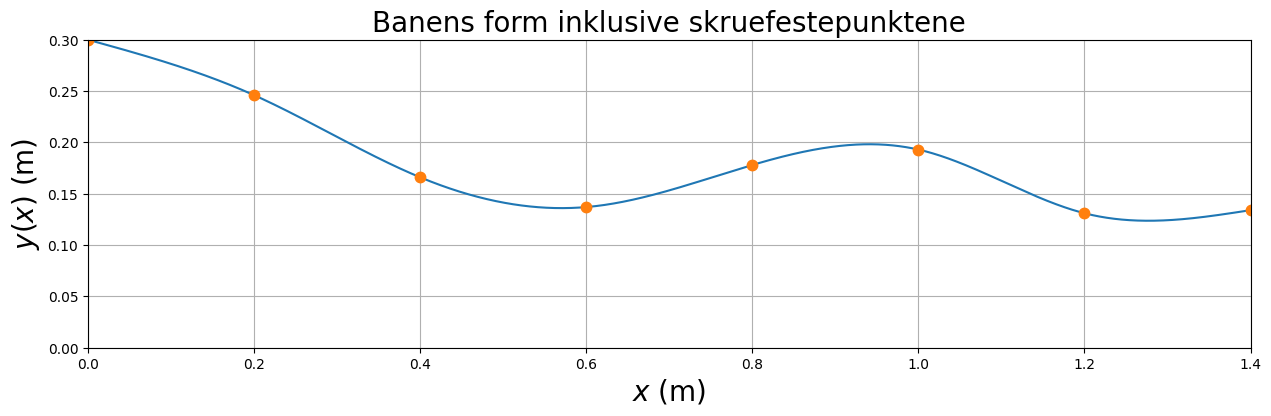

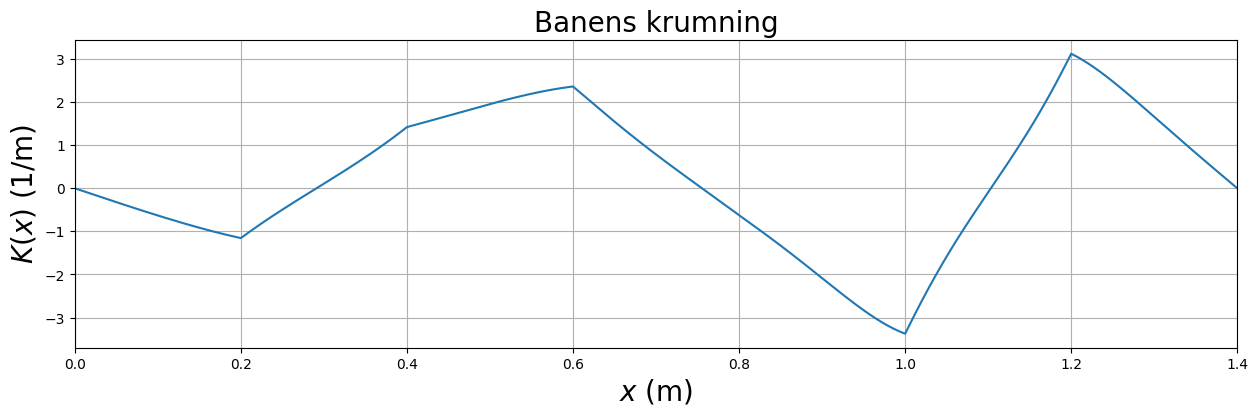

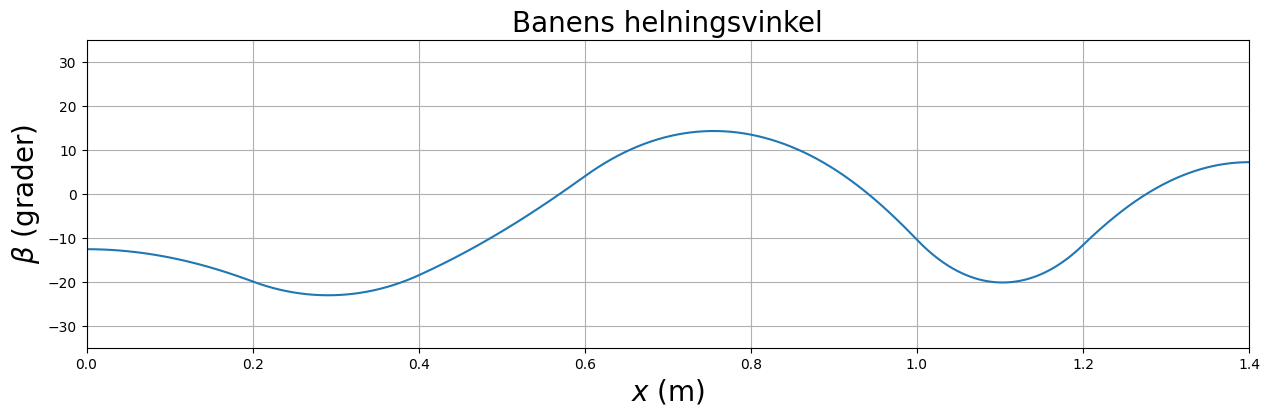

Bakketoppens høyeste punkt (m):  0.198
Banens laveste punkt (m):  0.124
Helningsvinkel i startposisjonen (grader): -12.6
Banens maksimale helningsvinkel (grader): 23.1
De 8 festepunkthøydene (m): [0.3   0.246 0.166 0.137 0.178 0.193 0.131 0.134]


In [53]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

#Tallverdier. Tryggest med SI-enheter fra start til mål!
M = 0.031    #kg
g = 9.81     #m/s**2
c = 2/5
h = 0.200    #m
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1.401
dx = 0.001
x = np.arange(xmin, xmax, dx)
Nx = len(x)

#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 0.300
yfast[1] = 0.246
yfast[2] = 0.166
yfast[3] = 0.137
yfast[4] = 0.178
yfast[5] = 0.193
yfast[6] = 0.131
yfast[7] = 0.134

#Kjør denne cellen så mange ganger dere vil, inntil dere får en baneform dere er fornøyd med.
#Når endelig baneform er valgt:
#Sett inn skruehøydene med 3 desimaler (m) og fjern kommentarsymbolet ("#") i neste linje.
#yfast = np.asarray([0.300,,,,,,,])
#Når endelig baneform er valgt, kan dere gjerne legge inn # i starten på de 8 linjene som beregner yfast[] ovenfor

#Beregninger:
cs = CubicSpline(xfast, yfast, bc_type='natural')
#y = baneformen y(x)
y = cs(x)
#dydx = dy/dx = y'(x) (dimensjonsløs)
dydx = cs(x,1)
#d2ydx2 = y''(x) (enhet 1/m)
d2ydx2 = cs(x,2)
#K = 1/R = banens krumning (1/m)
K = d2ydx2/(1+dydx**2)**(1.5)
#beta = banens helningsvinkel (rad)
beta = np.arctan(dydx)
#betadeg = banens helningsvinkel (grader)
betadeg = beta*180/np.pi
#startvinkel = helningsvinkel i startposisjonen (grader)
startvinkel = betadeg[0]
#maksvinkel = banens maksimale helningsvinkel, i absoluttverdi (grader)
maksvinkel = np.max(np.abs(betadeg))

#Plotting av banens form y(x)
plt.figure(figsize=(15,4))
plt.plot(x,y)
plt.plot(xfast,yfast,'.',markersize=15)
plt.title('Banens form inklusive skruefestepunktene',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$y(x)$ (m)',fontsize=20)
plt.ylim(0,0.300)
plt.xlim(0,1.400)
plt.grid()
plt.show()

#Plotting av banens krumning
plt.figure(figsize=(15,4))
plt.plot(x,K)
plt.title('Banens krumning',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel('$K(x)$ (1/m)',fontsize=20)
plt.xlim(0,1.400)
plt.grid()
plt.show()


#Plotting av banens helningsvinkel
plt.figure(figsize=(15,4))
plt.plot(x,betadeg)
plt.title('Banens helningsvinkel',fontsize=20)
plt.xlabel('$x$ (m)',fontsize=20)
plt.ylabel(r'$\beta$ (grader)',fontsize=20)
plt.ylim(-35,35)
plt.xlim(0,1.400)
plt.grid()
plt.show()

y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
print('Bakketoppens høyeste punkt (m): %6.3f' %y37max)
print('Banens laveste punkt (m): %6.3f' %y27min)
print('Helningsvinkel i startposisjonen (grader): %4.1f' %startvinkel)
print('Banens maksimale helningsvinkel (grader): %4.1f' %maksvinkel)
print('De 8 festepunkthøydene (m):', yfast)

## Numerisk beregnede fysiske størrelser
*I neste celle skal dere beregne sentrale fysiske størrelser med utgangspunkt i den valgte baneformen. Fullfør cellen med nødvendig kode slik at de ulike størrelsene beregnes og plottes i pene figurer, i samme format som figurene ovenfor. Husk enhet på alle akser. Der flere kurver vises i samme figur må det framgå hva hver enkelt kurve framstiller. Følgende størrelser skal beregnes og plottes:*
* Kulas hastighet (m/s) som funksjon av horisontal posisjon $x$ (m):
$$v(x)=\sqrt{\frac{10g[y(0)-y(x)]}{7}}$$
* Normalkraft $N$ og friksjonskraft $f$ (N) som funksjon av $x$ (m) i samme figur: <br>
$$N = Mg\cos\beta + M v^2K$$
$$f = \frac{2Mg\sin\beta}{7}$$
* Forholdet $|f/N|$ som funksjon av $x$ (m). <br>
* Kulas hastighet $v$ (m/s) som funksjon av tid $t$ (s). <br>
* Potensiell energi, kinetisk energi og total energi (J) som funksjon av $x$ (m). <br>

*Skriv til slutt ut tallverdier for kulas rulletid (s), slutthastighet (m/s) og tilhørende total mekanisk energi (J).*

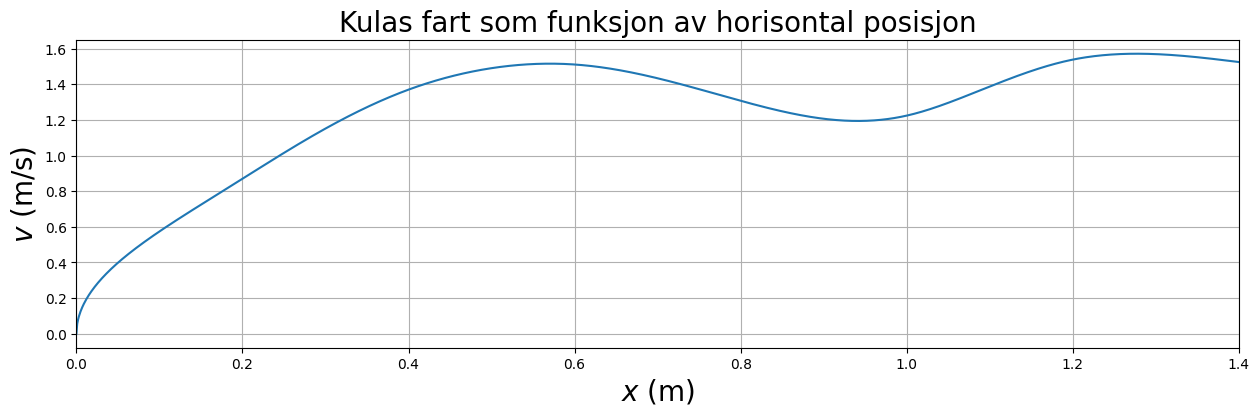

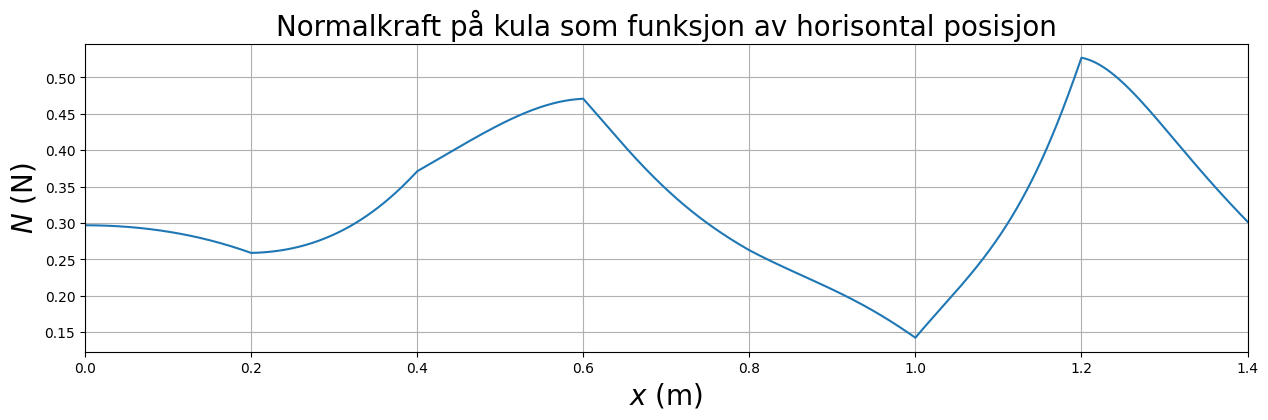

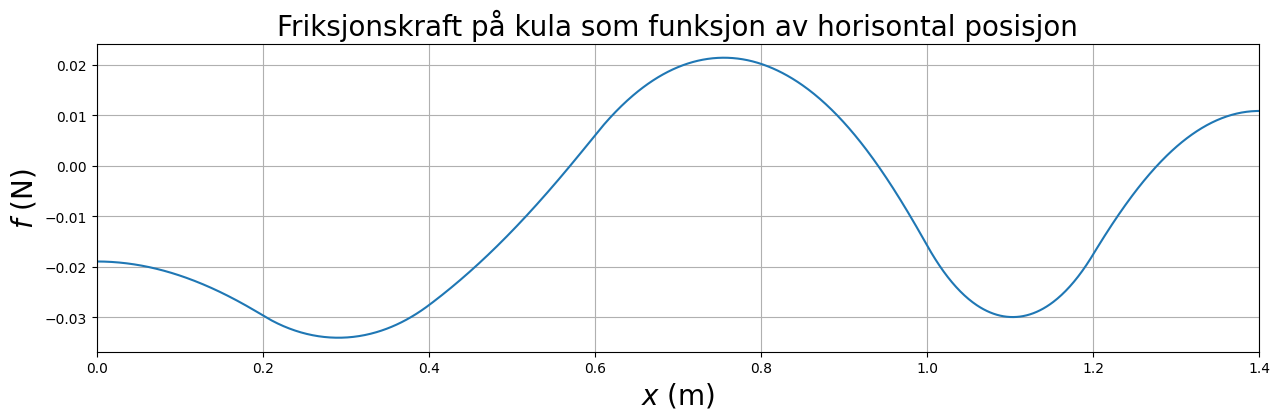

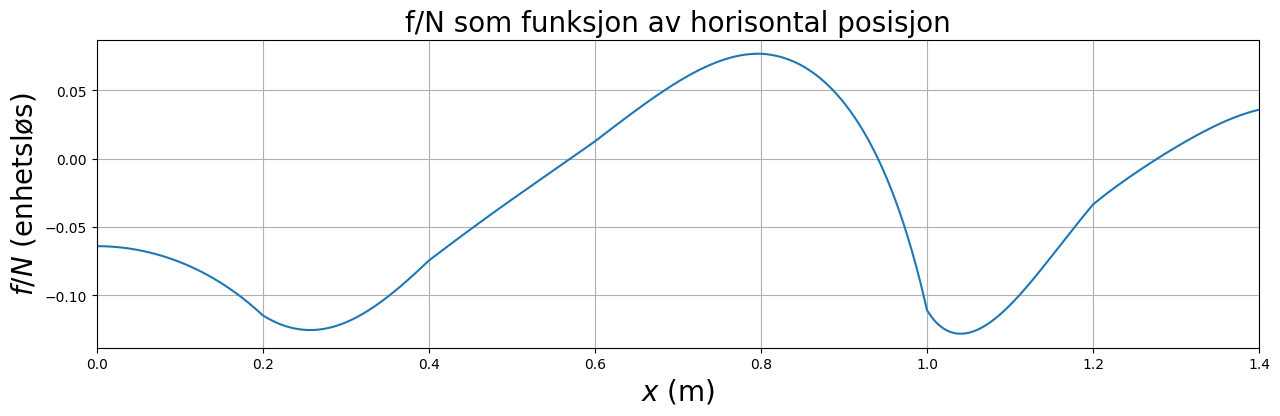

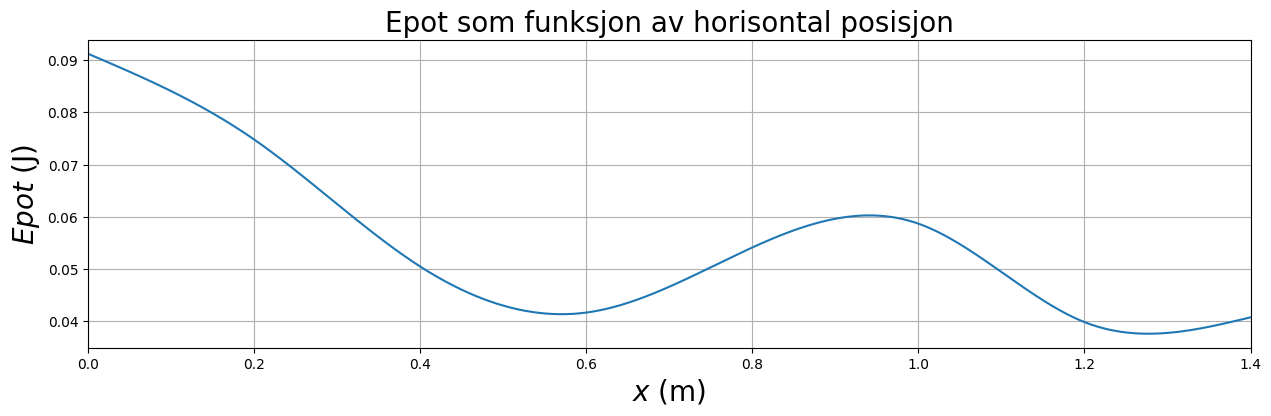

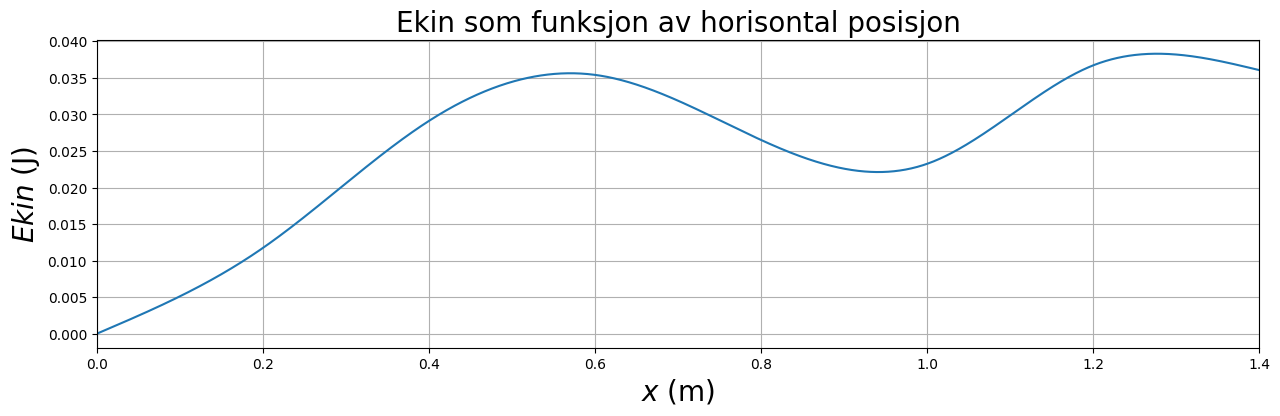

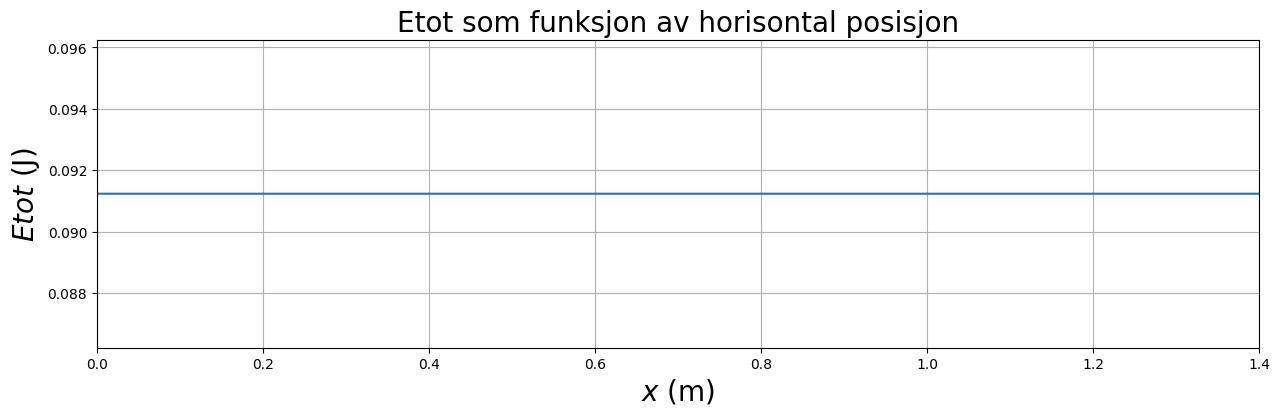

In [57]:
#Numerisk beregning og plotting av de fysiske størrelsene v(x), N(x), f(x), f/N|, v(t), Epot(x), Ekin(x), Etot(x)
# Beregning av  v(x)
vArray = np.sqrt(10 * g * ((y[0] - y) * (1/7)))

# Beregning av  N(x)
NormArray = M * g * np.cos(beta) + M * vArray**2 * K

# Beregning av f(x)
frictionArray = 2 * M * g * np.sin(beta) * (1/7)

# Beregning av f/N
foverN = frictionArray / NormArray

#beregning av v(t)

# Beregning Epot(x)
EpotArray = M * g * y

# Beregning Ekin(x)
EkinArray = (1/2) * M * vArray**2

# Bereging av Erot(x)
ErotArray = 1/2 * c * M * vArray**2

# Beregning Etot(x)
TotEnergiArray = EpotArray + EkinArray + ErotArray


# Plot av v(x)
plt.figure(figsize=(15,4))
plt.plot(x, vArray)
plt.title('Kulas fart som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v$ (m/s)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()

# Plot av N(x)
plt.figure(figsize=(15,4))
plt.plot(x, NormArray)
plt.title('Normalkraft på kula som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$N$ (N)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()

# Plot av f(x)
plt.figure(figsize=(15,4))
plt.plot(x, frictionArray)
plt.title('Friksjonskraft på kula som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$f$ (N)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()

# Plot f/N
plt.figure(figsize=(15,4))
plt.plot(x, foverN)
plt.title('f/N som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$f/N$ (enhetsløs)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()

# Plot av Epot(x)
plt.figure(figsize=(15,4))
plt.plot(x, EpotArray)
plt.title('Epot som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$Epot$ (J)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()

# Plot av Ekin(x)
plt.figure(figsize=(15,4))
plt.plot(x, EkinArray)
plt.title('Ekin som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$Ekin$ (J)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()

# Plot av Etot(x)
plt.figure(figsize=(15,4))
plt.plot(x, TotEnergiArray)
plt.title('Etot som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$Etot$ (J)', fontsize=20)
plt.xlim(0, 1.400)
plt.grid()
plt.show()



## Numerisk vs eksperimentell bane

*Fra Tracker har dere eksportert eksperimentelle tallverdier for (t,x,y) til en tekstfil, f eks data1.txt. I neste celle skriver dere kode som leser innholdet i data.txt og oppretter numpy arrays for (t,x,y). Det holder å lese inn data fra ett rulleforsøk. Slik importeres semikolonseparerte data fra en tekstfil data.txt:*
```python
import pandas as pd
data=pd.read_csv("data.txt",sep=";")
t1_exp=np.array(data["t"])
x1_exp=np.array(data["x"])
y1_exp=np.array(data["y"])
```
*t1_exp, x1_exp og y1_exp er nå tabeller (numpy arrays) med de verdiene som ble vist i kolonnene i Tracker. Første linje i fila data.txt må være <br><br>
t;x;y <br><br>
Deretter følger tallverdier for t, x og y fra og med 2. linje, f eks <br><br>
0.300;0.0016;0.3001 <br>
0.334;0.0022;0.2995 <br>
... <br><br>
Lag en figur som viser både numerisk og eksperimentell bane, dvs y(x) og y1_exp(x1_exp).*

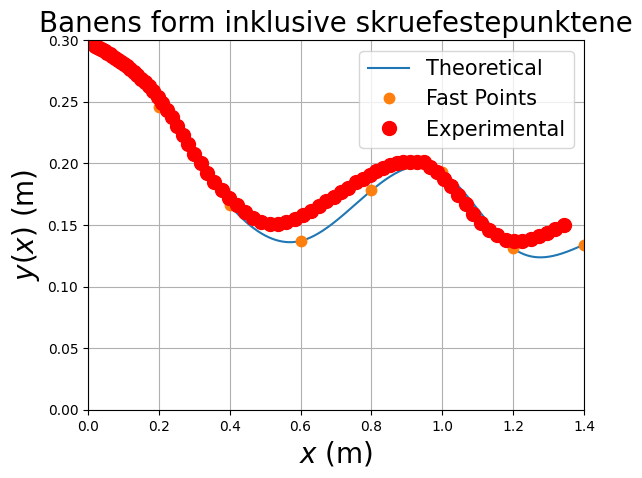

In [55]:
#Innlesing av eksperimentelle verdier for t, x og y

import pandas as pd

data1=pd.read_csv("firstVideoNew.txt", sep="	", skiprows=1)
data2=pd.read_csv("secondVideoNew.txt", sep="	", skiprows=1)
data3=pd.read_csv("thirdVideoNew.txt", sep="	", skiprows=1)
data4=pd.read_csv("fourthVideoNew.txt", sep="	", skiprows=1)
data5=pd.read_csv("fifthVideoNew.txt", sep="	", skiprows=1)
data6=pd.read_csv("sixthVideoNew.txt", sep="	", skiprows=1)
data7=pd.read_csv("seventhVideoNew.txt", sep="	", skiprows=1)
data8=pd.read_csv("eightVideoNew.txt", sep="	", skiprows=1)

t1_exp, x1_exp, y1_exp = np.array(data1["t"], dtype=float), np.array(data1["x"], dtype=float), np.array(data1["y"], dtype=float)
t2_exp, x2_exp, y2_exp = np.array(data2["t"], dtype=float), np.array(data2["x"], dtype=float), np.array(data2["y"], dtype=float)
t3_exp, x3_exp, y3_exp = np.array(data3["t"], dtype=float), np.array(data3["x"], dtype=float), np.array(data3["y"], dtype=float)
t4_exp, x4_exp, y4_exp = np.array(data4["t"], dtype=float), np.array(data4["x"], dtype=float), np.array(data4["y"], dtype=float)
t5_exp, x5_exp, y5_exp = np.array(data5["t"], dtype=float), np.array(data5["x"], dtype=float), np.array(data5["y"], dtype=float)
t6_exp, x6_exp, y6_exp = np.array(data6["t"], dtype=float), np.array(data6["x"], dtype=float), np.array(data6["y"], dtype=float)
t7_exp, x7_exp, y7_exp = np.array(data7["t"], dtype=float), np.array(data7["x"], dtype=float), np.array(data7["y"], dtype=float)
t8_exp, x8_exp, y8_exp = np.array(data8["t"], dtype=float), np.array(data8["x"], dtype=float), np.array(data8["y"], dtype=float)

#Plotting av numerisk og eksperimentell bane

# Original plots
plt.plot(x, y, label="Theoretical")
plt.plot(xfast, yfast, '.', markersize=15, label="Fast Points")

# Adding experimental data plot
plt.plot(x1_exp, y1_exp, 'o', markersize=10, label="Experimental", color='red')


# Customizations
plt.title('Banens form inklusive skruefestepunktene', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$y(x)$ (m)', fontsize=20)
plt.ylim(0, 0.300)
plt.xlim(0, 1.400)
plt.grid()

# Adding legend
plt.legend(fontsize=15)

# Show plot
plt.show()

## Numerisk vs eksperimentell hastighet

*I neste celle kan dere bruke numpyfunksjonen gradient til å beregne den eksperimentelle hastigheten til kula, både komponentene $v_x$ og $v_y$ og absoluttverdien $v = \sqrt{v_x^2+v_y^2}$. Tips:*
```python
vx1_exp = np.gradient(x1_exp,t1_exp)
```
*På tilsvarende vis lages vy1_exp, og deretter*
```python
v1_exp = np.sqrt(vx1_exp**2+vy1_exp**2)
```
*Lag figurer som sammenligner numerisk og eksperimentell $v(x)$, $v(t)$ og $x(t)$. Disse tre figurene gir et godt inntrykk av samsvaret mellom teoretisk og eksperimentell bevegelse.*

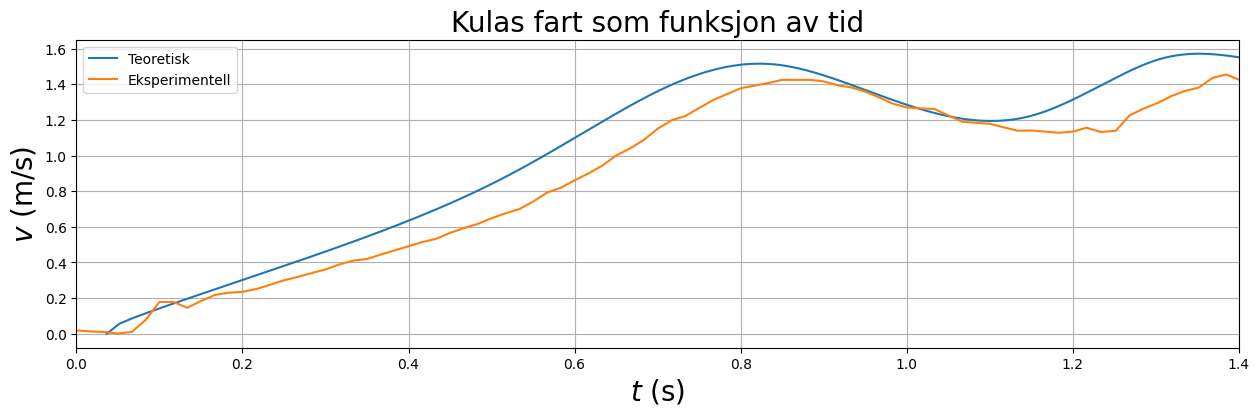

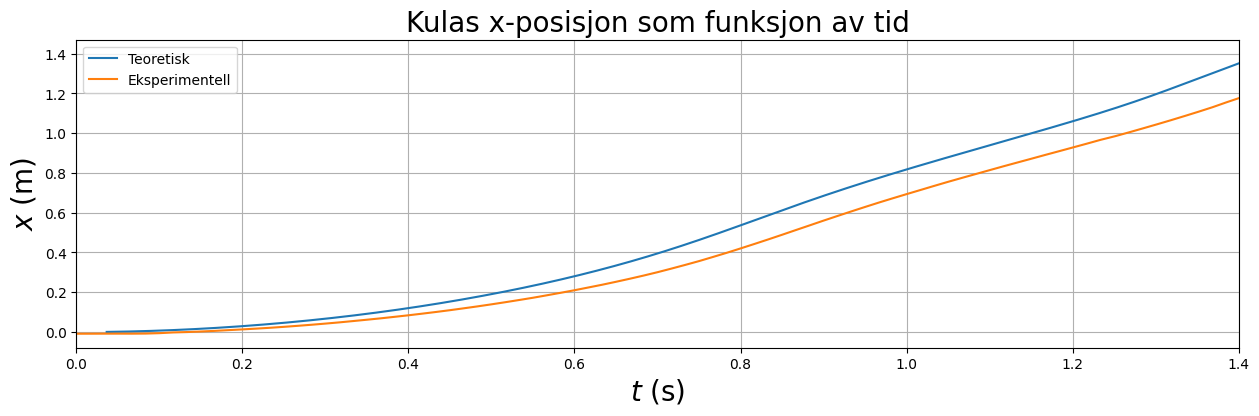

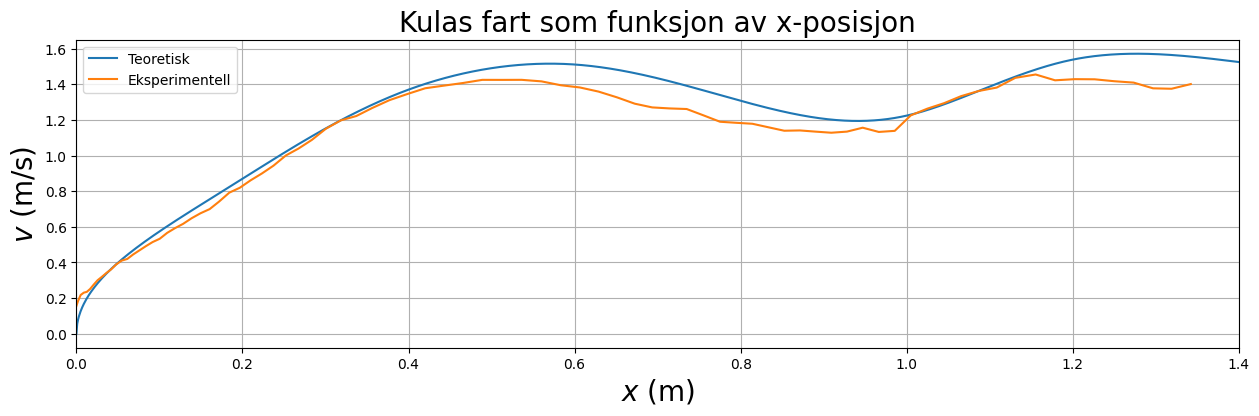

In [42]:
#Beregning av eksperimentell v_x, v_y og v

vx1_exp, vy1_exp = np.gradient(x1_exp,t1_exp), np.gradient(y1_exp,t1_exp)
v1_exp = np.sqrt(vx1_exp**2+vy1_exp**2)

vx2_exp, vy2_exp = np.gradient(x2_exp,t2_exp), np.gradient(y2_exp,t2_exp)
v2_exp = np.sqrt(vx2_exp**2+vy2_exp**2)

vx3_exp, vy3_exp = np.gradient(x3_exp,t3_exp), np.gradient(y3_exp,t3_exp)
v3_exp = np.sqrt(vx3_exp**2+vy3_exp**2)

vx4_exp, vy4_exp = np.gradient(x4_exp,t4_exp), np.gradient(y4_exp,t4_exp)
v4_exp = np.sqrt(vx4_exp**2+vy4_exp**2)

vx5_exp, vy5_exp = np.gradient(x5_exp,t5_exp), np.gradient(y5_exp,t5_exp)
v5_exp = np.sqrt(vx5_exp**2+vy5_exp**2)

vx6_exp, vy6_exp = np.gradient(x6_exp,t6_exp), np.gradient(y6_exp,t6_exp)
v6_exp = np.sqrt(vx6_exp**2+vy6_exp**2)

vx7_exp, vy7_exp = np.gradient(x7_exp,t7_exp), np.gradient(y7_exp,t7_exp)
v7_exp = np.sqrt(vx7_exp**2+vy7_exp**2)

vx8_exp, vy8_exp = np.gradient(x8_exp,t8_exp), np.gradient(y8_exp,t8_exp)
v8_exp = np.sqrt(vx8_exp**2+vy8_exp**2)

# for a segment i
# all of the time differences
deltatArray = np.zeros(len(vArray))

# array of times
tArray = np.zeros(len(vArray))

# calculates the time difference using formula found in lab text
for n in range(len(deltatArray)-1):
  deltatArray[n] = 2*dx/(vArray[n] + vArray[n+1])/np.cos(beta[n])

# summing all of the time differences up to that point
tArray[0] = deltatArray[0]
for n in range(len(deltatArray)-1):
  tArray[n+1]=tArray[n]+deltatArray[n+1]

# sets last time since the last element of deltatArray could not be calculated due to indexing
tArray[-1] = tArray[-2] + dx/vArray[-1]/np.cos(beta[-1])



#Figurer som sammenligner numerisk og eksperimentell v(x), v(t) og x(t)

# Plot av v(t)
plt.figure(figsize=(15,4))
# TEORETISK GRAF
plt.plot(tArray, vArray, label = 'Teoretisk')
# EXMPERIMENTELL GRAF
plt.plot(t1_exp,v1_exp,label = 'Eksperimentell')
plt.title('Kulas fart som funksjon av tid', fontsize=20)
plt.xlabel('$t$ (s)', fontsize=20)
plt.ylabel('$v$ (m/s)', fontsize=20)
plt.xlim(0, 1.400)
plt.legend()
plt.grid()
plt.show()

# Plot av x(t)
plt.figure(figsize=(15,4))
# TEORETISK GRAF
plt.plot(tArray, x, label = 'Teoretisk')
# EXMPERIMENTELL GRAF
plt.plot(t1_exp,x1_exp, label = 'Eksperimentell')

plt.title('Kulas x-posisjon som funksjon av tid', fontsize=20)
plt.xlabel('$t$ (s)', fontsize=20)
plt.ylabel('$x$ (m)', fontsize=20)
plt.xlim(0, 1.400)
plt.legend()
plt.grid()
plt.show()

# Plot av v(x)
plt.figure(figsize=(15,4))
# TEORETISK GRAF
plt.plot(x, vArray, label = 'Teoretisk')
# EXMPERIMENTELL GRAF
plt.plot(x1_exp,v1_exp, label = 'Eksperimentell')
plt.title('Kulas fart som funksjon av x-posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$v$ (m/s)', fontsize=20)
plt.xlim(0, 1.400)
plt.legend()
plt.grid()
plt.show()

## Numeriske vs eksperimentelle mekaniske energier

*I neste celle beregner dere eksperimentelle mekaniske energier: Kinetisk energi (translasjonsenergi og rotasjonsenergi), potensiell energi og total mekanisk energi. Sammenlign numerisk og eksperimentell total mekanisk, kinetisk og potensiell energi i en og samme figur (i alt 6 kurver).*

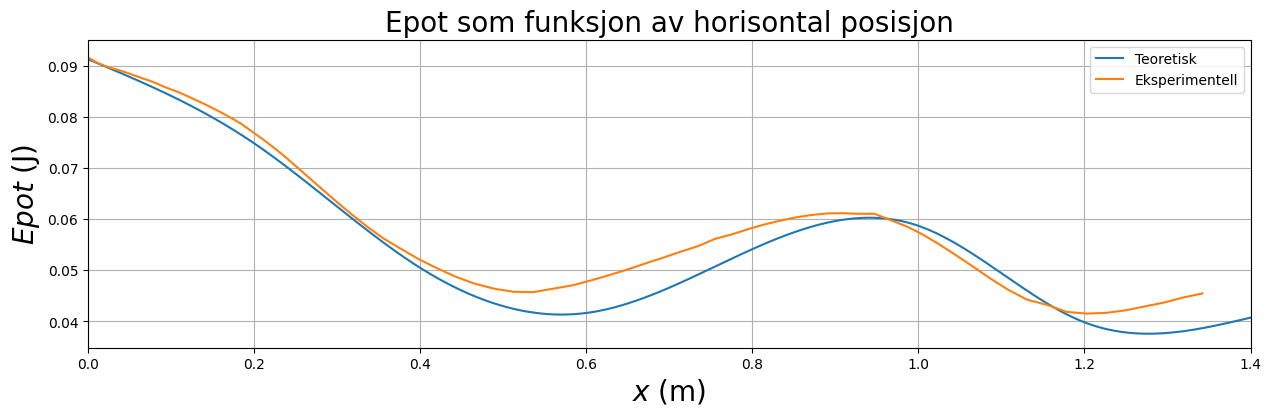

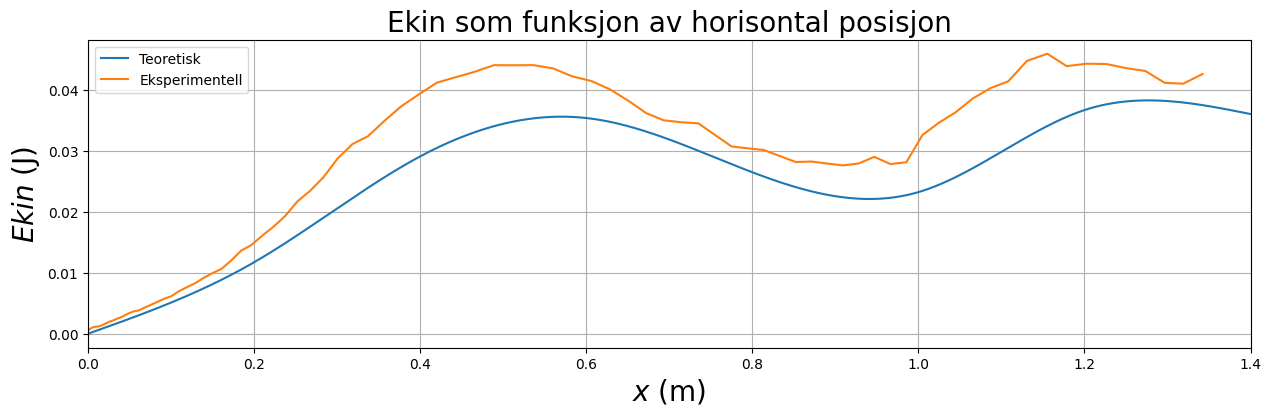

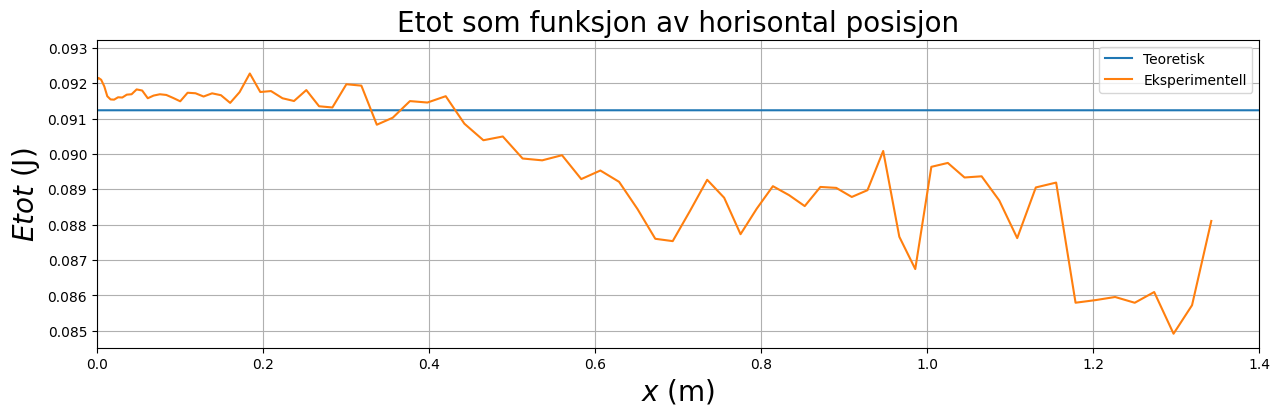

In [44]:
#Beregning av eksperimentell Etrans_exp, Erot1_exp, Ekin_exp, Epot1_exp, Etot1_exp
Etrans_exp = 1/2*M*v1_exp**2
Erot1_exp = 1/2*M*c*v1_exp**2
Ekin_exp = Erot1_exp + Etrans_exp
Epot1_exp = M*g*y1_exp
Etot1_exp = Ekin_exp + Epot1_exp

#Figurer som sammenligner numerisk og eksperimentell kinetisk, potensiell og total mekanisk energi

# Plot av Epot(x)
plt.figure(figsize=(15,4))
# TEORETISK GRAF
plt.plot(x, EpotArray, label = 'Teoretisk')
# EXPERIMENTELL GRAF
plt.plot(x1_exp,Epot1_exp, label = 'Eksperimentell')
plt.title('Epot som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$Epot$ (J)', fontsize=20)
plt.xlim(0, 1.400)
plt.legend()
plt.grid()
plt.show()

# Plot av Ekin(x)
plt.figure(figsize=(15,4))
# TEORETISK GRAF
plt.plot(x, EkinArray, label = 'Teoretisk')
# EXMPERIMENTELL GRAF
plt.plot(x1_exp,Ekin_exp, label = 'Eksperimentell')
plt.title('Ekin som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$Ekin$ (J)', fontsize=20)
plt.xlim(0, 1.400)
plt.legend()
plt.grid()
plt.show()

# Plot av Etot(x)
plt.figure(figsize=(15,4))
# TEORETISK GRAF
plt.plot(x, TotEnergiArray, label = 'Teoretisk')
# EXMPERIMENTELL GRAF
plt.plot(x1_exp,Etot1_exp,label = 'Eksperimentell')
plt.title('Etot som funksjon av horisontal posisjon', fontsize=20)
plt.xlabel('$x$ (m)', fontsize=20)
plt.ylabel('$Etot$ (J)', fontsize=20)
plt.xlim(0, 1.400)
plt.legend()
plt.grid()
plt.show()


## Er den mekaniske energien bevart i rulleforsøkene?
*Fordel de 8 rulleforsøkene på gruppas medlemmer. For hvert rulleforsøk: Bruk posisjons- og fartsdata i start- og sluttpunktet fra Tracker til å beregne total mekanisk energi $E_i$ i startposisjonen (ved $x=0$) og $E_f$ i sluttposisjonen (ved $x=1.40$ m). I neste celle: Skriv de 8 verdiene for $E_i$ og $E_f$ inn i numpy arrays. Beregn 8 verdier for $\Delta E = E_i-E_f$ og deretter midlere tap i mekanisk energi med usikkerhet (den såkalte standardfeilen). Skriv ut resultatet på formen $\Delta E = (2.5 \pm 0.4)$ mJ, med egne tallverdier selvsagt. En passende enhet for $\Delta E$ er trolig mJ.*

In [61]:
import numpy as np

masse = 0.031
start_hoyde = 0.246
slutt_hoyde = 0.134
start_fart_liste = np.array([v1_exp[0], v2_exp[0], v3_exp[0], v4_exp[0], v5_exp[0], v6_exp[0], v7_exp[0], v8_exp[0]])
slutt_fart_liste = np.array([v1_exp[-1], v2_exp[-1], v3_exp[-1], v4_exp[-1], v5_exp[-1], v6_exp[-1], v7_exp[-1], v8_exp[-1]])

def mekanisk_energi(h, v, m):
    return masse*9.81*h+(1/2)*m*v**2

E_i = mekanisk_energi(start_hoyde, start_fart_liste, masse)
E_f = mekanisk_energi(slutt_hoyde, slutt_fart_liste, masse)
Delta_E = E_f - E_i

middelverdi = np.mean(Delta_E)
standardavvik = np.std(Delta_E)
standardfeil = standardavvik/np.sqrt(8)

#Utskrift av Delta E på formen Delta E = (Middelverdi +- Standardfeil) mJ
print(f"Delta E = {middelverdi} +- {standardfeil} mJ")

Delta E = -0.001954016137210999 +- 0.0009122245861020174 mJ


## Noen avsluttende spørsmål
*Første spørsmål tar utgangspunkt i de eksperimentelle resultatene:*
- Er beregnet middelverdi og usikkerhet for tapt mekanisk energi i samsvar med antagelsen om at kula ruller rent uten å gli? I motsatt fall: Diskuter kort noen faktorer som kan bidra til at mekanisk energi går tapt i rulleforsøkene. <br>

*De neste spørsmålene tar utgangspunkt i de teoretiske (numeriske) resultatene:* <br>
- Er grafen for $f(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt topp- og bunnpunktene, samt fortegnet på $f(x)$ underveis.
- Er grafen for $N(x)$ rimelig, med utgangspunkt i baneformen $y(x)$? Vurder spesielt om $N$ har stor verdi på forventede steder.
- Maksimal statisk friksjonskraft er som kjent bestemt av $\mu_s N$. Hva må den statiske friksjonskoeffisienten $\mu_s$ mellom kule og bane minst være for at kula hele veien skal rulle rent uten å gli? Grafen for $|f(x)/N(x)|$ gir grunnlag for å svare på dette.
- Grafen for banens krumning $K(x)$ er kontinuerlig (sammenhengende), med tydelige knekkpunkter for hver 20. cm. Er dette som forventet? Forklar.
- I det teoretiske grunnlaget er det antatt at kulas radius er liten sammenlignet med banens krumningsradius. Er denne antagelsen i orden langs hele banen? Sammenlign kuleradien med banens minste krumningsradius.



*   Man ser fra grafen at mekanisk energi blir mistet, noe som tyder på at ballen muligens glir litt.
*   Den kan også miste energi til lyd, varme, vibrasjone.




*   ved topp- og bunnpunktene bytter fortegnet til f(x). Grafen er rimelig fordi den viser at friksjonskraften er størst når krummingen er lav
*   N har størst verdi når bakken krummer oppover og N har lavest verdi når den krummer nedover. Dette ser vi, dermed er grafen til N(x) rimelig.
*   Den statiske friksjonskoeffisienten må være maksimumsverdien av absoluttverdien til grafen f/N. Vi ser fra grafen at verdien er ca. 0.13
*   Splines funker ved trekke sammen kubikk polynomer slik at deres første og andre deriverte skal ha like verdier ved knutepunktene. Men dette garanterer ikke at deres tredje deriverte må være like, det som skal til for at det ikke skal være knekkepunkter.
*   Radiusen til ballen er 1.1cm , minste krumningsradiusen til banen er ca 30cm, dermed er antagelsen god gjennom hele banen

